In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
sp500 = pd.read_csv("sp500.csv", index_col=0)
sp500.index = pd.to_datetime(sp500.index, format="%Y-%m-%d")
sp500.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


<Axes: xlabel='Date'>

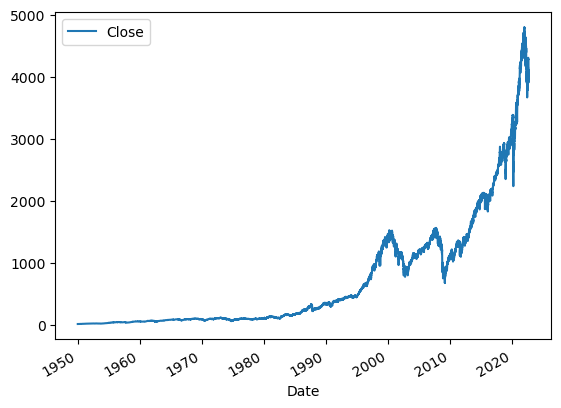

In [4]:
sp500.plot.line(y="Close", use_index=True)

In [5]:
sp500.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [6]:
sp500['Target'] = (sp500["Close"].shift(-1) > sp500["Close"]).astype(int)
sp500.sample(5)

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4306490000,1
1962-05-07,0.000000,66.559998,65.660004,66.019997,2530000,0
2008-05-15,1408.359985,1424.400024,1406.869995,1423.569946,3836480000,1
2014-11-25,2070.149902,2074.209961,2064.750000,2067.030029,3392940000,1
2004-04-19,1134.560059,1136.180054,1129.839966,1135.819946,1194900000,0


In [7]:
sp500['Open'].replace(0, pd.NaT, inplace=True)
sp500['Open'].fillna(sp500['Close'].shift(), inplace=True)

sp500["Open Close Ratio"] = sp500["Close"]/sp500["Open"]
sp500["Close Open Ratio"] = sp500["Close"].shift(1)/sp500["Open"]
sp500["Price Range"] = sp500["High"] - sp500["Low"]
sp500["Price Change"] = sp500["Close"] - sp500["Open"] 
sp500["Daily Returns"] = sp500["Close"].pct_change()
sp500["Volume Change"] = sp500["Volume"].pct_change()
sp500["Volume Weighted Average Price"] = (sp500['Close'] * sp500['Volume']).cumsum() / sp500['Volume'].cumsum()


sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,Daily Returns,Volume Change,Volume Weighted Average Price
Date,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,NaN,NaN,16.660000
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,0.011405,0.500000,16.774000
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,0.004748,0.349206,16.843790
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,0.002953,-0.211765,16.879300
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,0.005889,0.253731,16.928739


In [8]:
horizons = [2,5,60,250,1000]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    volume_column = f"Volume_Ratio_{horizon}"
    sp500[volume_column] = sp500["Volume"] / rolling_averages["Volume"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500.dropna

sp500 = sp500.replace([np.inf, -np.inf], np.nan).dropna()

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,0,1.017799,1.0,7.709991,6.290009,...,4.0,1.042631,0.998595,34.0,1.111061,0.978555,149.0,1.289445,0.984391,568.0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,0,0.997414,1.0,2.699982,-0.929993,...,4.0,1.039936,1.182636,33.0,1.107120,1.160392,148.0,1.285414,1.167427,568.0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,0,0.991387,1.0,5.869995,-3.089996,...,3.0,1.031185,1.078405,32.0,1.096573,1.067545,147.0,1.273659,1.074058,568.0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,1,0.990244,1.0,4.320007,-3.470001,...,2.0,1.021467,0.964798,32.0,1.084914,0.955729,147.0,1.260562,0.961820,568.0
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,0,1.004514,1.0,3.699982,1.589996,...,2.0,1.026237,0.854773,33.0,1.088849,0.844860,147.0,1.265575,0.850013,568.0


In [10]:
X = sp500.drop("Target", axis=1)
y = sp500.Target

all_feature_cols = X.columns.tolist()

print(X.shape)
print(y.shape)
print(all_feature_cols)

(8235, 27)
(8235,)
['Open', 'High', 'Low', 'Close', 'Volume', 'Open Close Ratio', 'Close Open Ratio', 'Price Range', 'Price Change', 'Daily Returns', 'Volume Change', 'Volume Weighted Average Price', 'Close_Ratio_2', 'Volume_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Volume_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Volume_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Volume_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Volume_Ratio_1000', 'Trend_1000']


In [16]:
def predict(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:,1]
    preds[preds >=.6] = 1
    preds[preds <= .4] = 0
    preds = pd.Series(preds, index=X_test.index, name="Predictions")
    combined = pd.concat([y_test.reset_index(drop=True), preds.reset_index(drop=True)], axis=1)
    combined = combined.loc[(combined["Predictions"] == 0.0) | (combined["Predictions"] == 1.0), :]
    return combined

def backtest(X, y, cols, model, start=750, step=250):
    all_predictions = []

    for i in range(start, X.shape[0], step):
        X_train = X[cols].iloc[0:i].copy()
        X_test = X[cols].iloc[i:(i+step)].copy()
        y_train = y.iloc[0:i].copy()
        y_test = y.iloc[i:(i+step)].copy()
        predictions = predict(X_train, X_test, y_train, y_test, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_saga = LogisticRegression(solver="saga", random_state=1)

result_whitebox = backtest(X, y, all_feature_cols, log_saga)

print(classification_report(result_whitebox.Target, result_whitebox.Predictions))

c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.48      1.00      0.65        61

    accuracy                           0.48       127
   macro avg       0.24      0.50      0.32       127
weighted avg       0.23      0.48      0.31       127



c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

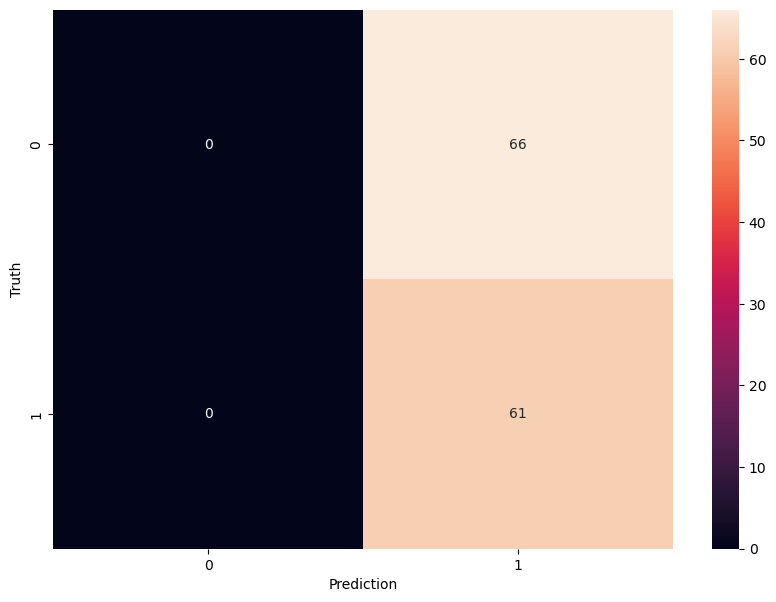

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox.Target, result_whitebox.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [14]:
from sklearn.preprocessing import MinMaxScaler

X["Year"] = X.index.year

yearGroup = X.groupby("Year")

scaler = MinMaxScaler()

scaled_dfs = []
for year, group in yearGroup:
    group_scaled = pd.DataFrame(scaler.fit_transform(group), columns=group.columns)
    scaled_dfs.append(group_scaled)


# Concatenate the scaled DataFrames
X_scaled = pd.concat(scaled_dfs)

X_scaled = X_scaled.drop("Year", axis=1)

X_scaled.head(5)

,Open,High,Low,Close,Volume,Open Close Ratio,Close Open Ratio,Price Range,Price Change,Daily Returns,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
0,0.788435,0.852334,0.789423,0.873996,0.439375,0.775023,0.865922,0.535445,0.822834,0.773372,...,0.8,0.869223,0.446547,0.500000,1.000000,0.412497,1.000000,1.000000,0.451527,1.0
1,0.874013,0.865506,0.870605,0.861342,0.566156,0.446188,0.865922,0.117596,0.467520,0.445237,...,0.8,0.855657,0.575253,0.428571,0.983757,0.534299,0.941176,0.986669,0.579719,1.0
2,0.861361,0.838724,0.801923,0.819295,0.501927,0.348953,0.865922,0.381984,0.361220,0.348209,...,0.6,0.811603,0.502360,0.357143,0.940287,0.472106,0.882353,0.947790,0.514327,1.0
3,0.819320,0.793502,0.780769,0.772078,0.424543,0.330510,0.865922,0.252711,0.342519,0.329806,...,0.4,0.762679,0.422912,0.357143,0.892232,0.397207,0.882353,0.904472,0.435720,1.0
4,0.772109,0.772574,0.769643,0.793713,0.347369,0.560725,0.865922,0.200999,0.591535,0.559530,...,0.4,0.786692,0.345968,0.428571,0.908449,0.322943,0.882353,0.921053,0.357415,1.0


In [19]:
result_whitebox_scaled = backtest(X_scaled, y, all_feature_cols, log_saga)

print(classification_report(result_whitebox_scaled.Target, result_whitebox_scaled.Predictions))

              precision    recall  f1-score   support

           0       0.54      0.31      0.40       617
           1       0.59      0.79      0.67       772

    accuracy                           0.58      1389
   macro avg       0.56      0.55      0.53      1389
weighted avg       0.57      0.58      0.55      1389



Text(95.72222222222221, 0.5, 'Truth')

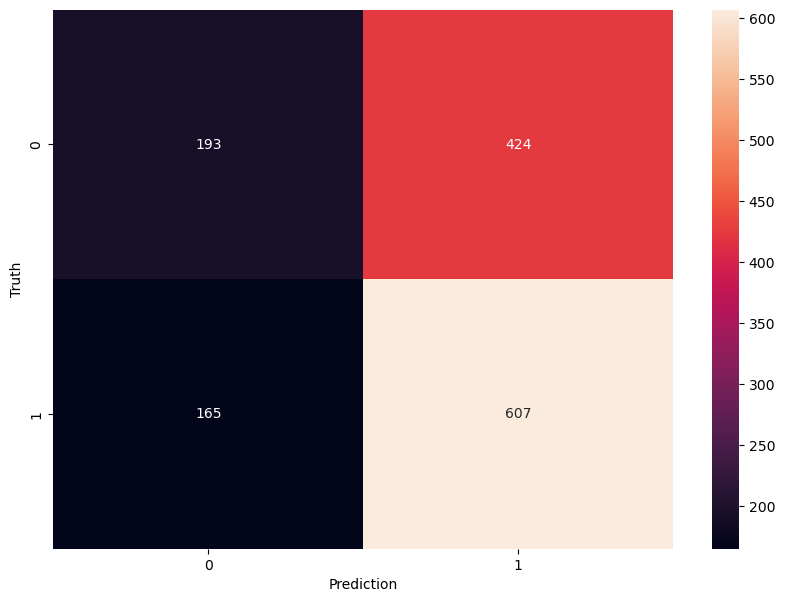

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_scaled.Target, result_whitebox_scaled.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [21]:
log_lib =  LogisticRegression(solver="liblinear", random_state=1)

result_whitebox_lib = backtest(X_scaled, y, all_feature_cols, log_lib)

print(classification_report(result_whitebox_lib.Target, result_whitebox_lib.Predictions))

              precision    recall  f1-score   support

           0       0.53      0.31      0.39       588
           1       0.59      0.78      0.67       734

    accuracy                           0.57      1322
   macro avg       0.56      0.55      0.53      1322
weighted avg       0.56      0.57      0.55      1322



Text(95.72222222222221, 0.5, 'Truth')

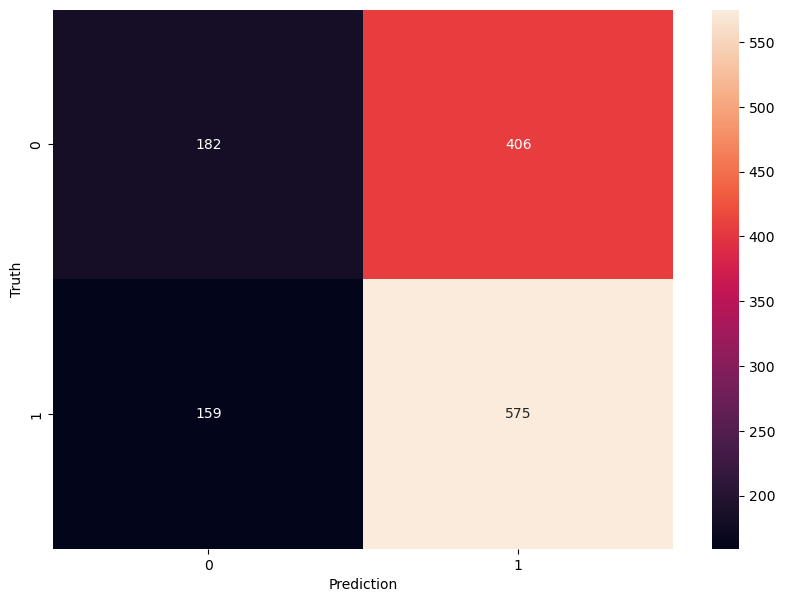

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_lib.Target, result_whitebox_lib.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [25]:
log_saga_01 = LogisticRegression(solver="saga", random_state=1, C=.1)

result_whitebox_01 = backtest(X_scaled, y, all_feature_cols, log_saga_01)

print(classification_report(result_whitebox_01.Target, result_whitebox_01.Predictions))

              precision    recall  f1-score   support

           0       0.52      0.22      0.31       414
           1       0.60      0.85      0.71       574

    accuracy                           0.59       988
   macro avg       0.56      0.54      0.51       988
weighted avg       0.57      0.59      0.54       988



Text(95.72222222222221, 0.5, 'Truth')

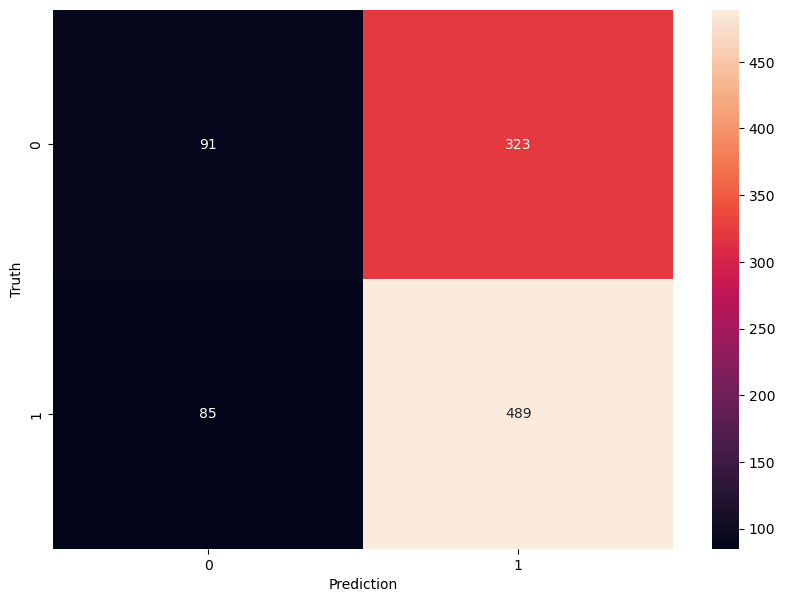

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_01.Target, result_whitebox_01.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [32]:
log_saga_10 = LogisticRegression(solver="saga", random_state=1, C=0.01)

result_whitebox_10 = backtest(X_scaled, y, all_feature_cols, log_saga_10)

print(classification_report(result_whitebox_10.Target, result_whitebox_10.Predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.65      1.00      0.79       207

    accuracy                           0.65       317
   macro avg       0.33      0.50      0.40       317
weighted avg       0.43      0.65      0.52       317



c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

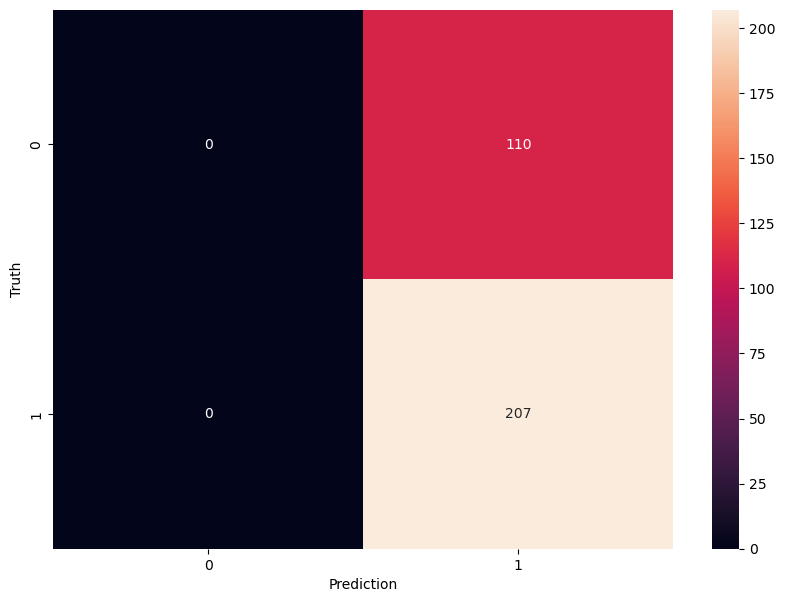

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_10.Target, result_whitebox_10.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [34]:
import xgboost as xgb

dmatrix = xgb.DMatrix(X_scaled, label=y)
params = {
    'objective': 'binary:logistic',  # Use 'reg:linear' for regression or 'binary:logistic' for classification
}
model = xgb.train(params, dmatrix)
importance = model.get_score(importance_type='gain')  # 'gain' or 'weight' or 'cover'
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

for feature, score in importance_sorted:
    print(f"Feature: {feature}, Score: {score}")

Feature: Trend_250, Score: 12.474315643310547
Feature: Close_Ratio_2, Score: 12.049256324768066
Feature: High, Score: 11.258987426757812
Feature: Volume_Ratio_1000, Score: 9.901001930236816
Feature: Low, Score: 9.706275939941406
Feature: Close_Ratio_250, Score: 8.688344955444336
Feature: Trend_1000, Score: 7.575810432434082
Feature: Close, Score: 7.427677154541016
Feature: Trend_60, Score: 7.167404651641846
Feature: Close_Ratio_60, Score: 7.045038223266602
Feature: Close_Ratio_1000, Score: 6.838932991027832
Feature: Open Close Ratio, Score: 6.335092067718506
Feature: Volume Weighted Average Price, Score: 6.227462291717529
Feature: Price Range, Score: 6.098265647888184
Feature: Volume_Ratio_250, Score: 6.016364574432373
Feature: Volume_Ratio_60, Score: 5.766828536987305
Feature: Open, Score: 5.4968342781066895
Feature: Volume, Score: 5.479288101196289
Feature: Close Open Ratio, Score: 5.3470611572265625
Feature: Price Change, Score: 4.7330121994018555
Feature: Daily Returns, Score: 4.68

In [60]:
top10_cols = []
for feature, score in importance_sorted[:10]:
    top10_cols.append(feature)

log_saga_01 = LogisticRegression(solver="saga", random_state=1, C=0.1)

result_whitebox_scaled_10 = backtest(X_scaled, y, top10_cols, log_saga_01)

print(classification_report(result_whitebox_scaled_10.Target, result_whitebox_scaled_10.Predictions))

              precision    recall  f1-score   support

           0       0.70      0.14      0.24       280
           1       0.63      0.96      0.76       424

    accuracy                           0.63       704
   macro avg       0.67      0.55      0.50       704
weighted avg       0.66      0.63      0.55       704



Text(95.72222222222221, 0.5, 'Truth')

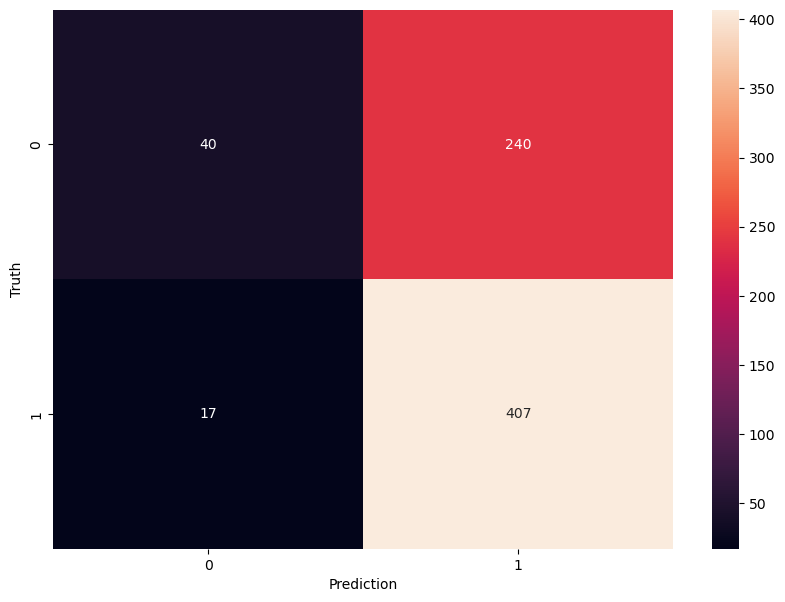

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_scaled_10.Target, result_whitebox_scaled_10.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [62]:
top15_cols = []
for feature, score in importance_sorted[:15]:
    top15_cols.append(feature)

log_saga_01 = LogisticRegression(solver="saga", random_state=1, C=0.1)

result_whitebox_scaled_15 = backtest(X_scaled, y, top15_cols, log_saga_01)

print(classification_report(result_whitebox_scaled_15.Target, result_whitebox_scaled_15.Predictions))

              precision    recall  f1-score   support

           0       0.54      0.17      0.26       351
           1       0.62      0.90      0.74       536

    accuracy                           0.61       887
   macro avg       0.58      0.54      0.50       887
weighted avg       0.59      0.61      0.55       887



Text(95.72222222222221, 0.5, 'Truth')

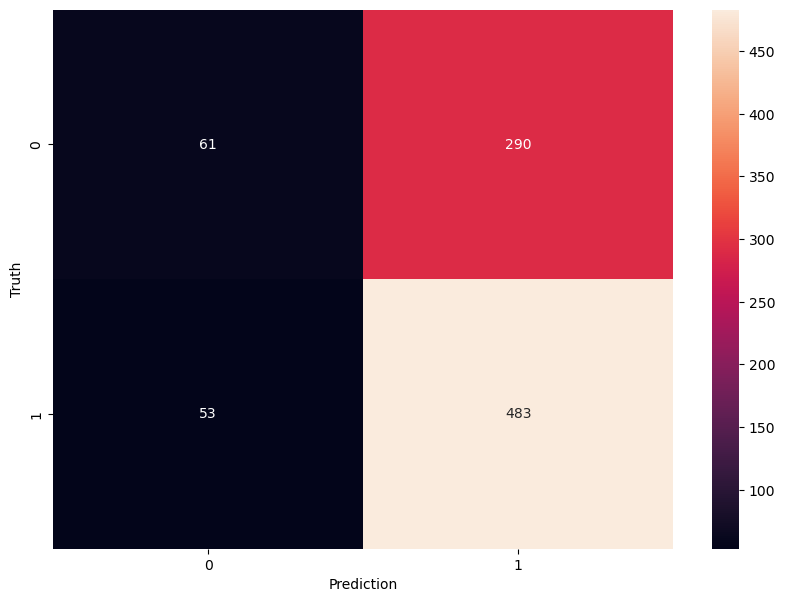

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_scaled_15.Target, result_whitebox_scaled_15.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [64]:
top20_cols = []
for feature, score in importance_sorted[:20]:
    top20_cols.append(feature)

log_saga_01 = LogisticRegression(solver="saga", random_state=1, C=0.1)

result_whitebox_scaled_20 = backtest(X_scaled, y, top20_cols, log_saga_01)

print(classification_report(result_whitebox_scaled_20.Target, result_whitebox_scaled_20.Predictions))

              precision    recall  f1-score   support

           0       0.53      0.18      0.27       364
           1       0.61      0.89      0.72       529

    accuracy                           0.60       893
   macro avg       0.57      0.53      0.50       893
weighted avg       0.58      0.60      0.54       893



Text(95.72222222222221, 0.5, 'Truth')

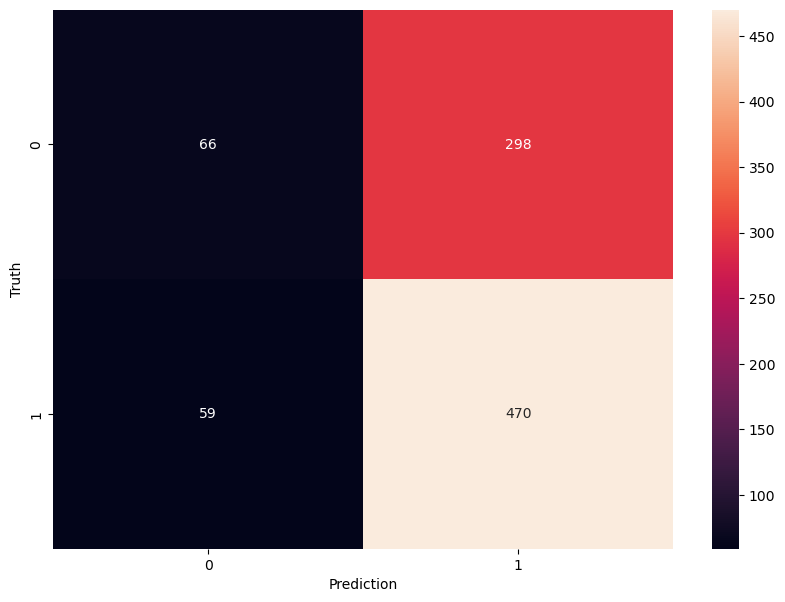

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_scaled_20.Target, result_whitebox_scaled_20.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [66]:
log_saga_01_l1 = LogisticRegression(solver="saga", random_state=1, C=0.1, penalty="l1")

result_whitebox_01_l1 = backtest(X_scaled, y, all_feature_cols, log_saga_01_l1)

print(classification_report(result_whitebox_01_l1.Target, result_whitebox_01_l1.Predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       127
           1       0.62      1.00      0.76       206

    accuracy                           0.62       333
   macro avg       0.31      0.50      0.38       333
weighted avg       0.38      0.62      0.47       333



c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

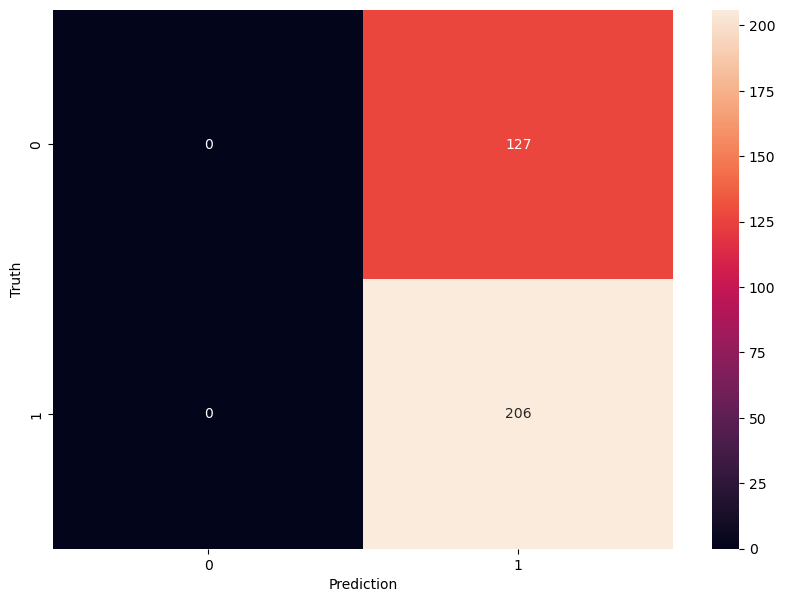

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_01_l1.Target, result_whitebox_01_l1.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [68]:
# Access the coefficients
coefficients = log_saga_01_l1.coef_

filtered_coef = []

for feature, coef in zip(all_feature_cols, coefficients[0]):
    if coef!=0.0:
        filtered_coef.append(feature)

filtered_coef

['Close',
 'Price Change',
 'Volume Weighted Average Price',
 'Trend_2',
 'Trend_5',
 'Close_Ratio_250',
 'Volume_Ratio_250',
 'Trend_250',
 'Volume_Ratio_1000',
 'Trend_1000']

In [69]:
log_saga_01 = LogisticRegression(solver="saga", random_state=1, C=0.1)

result_whitebox_scaled_l1 = backtest(X_scaled, y, filtered_coef, log_saga_01)

print(classification_report(result_whitebox_scaled_l1.Target, result_whitebox_scaled_l1.Predictions))

              precision    recall  f1-score   support

           0       0.52      0.20      0.29       323
           1       0.62      0.88      0.73       488

    accuracy                           0.61       811
   macro avg       0.57      0.54      0.51       811
weighted avg       0.58      0.61      0.55       811



Text(95.72222222222221, 0.5, 'Truth')

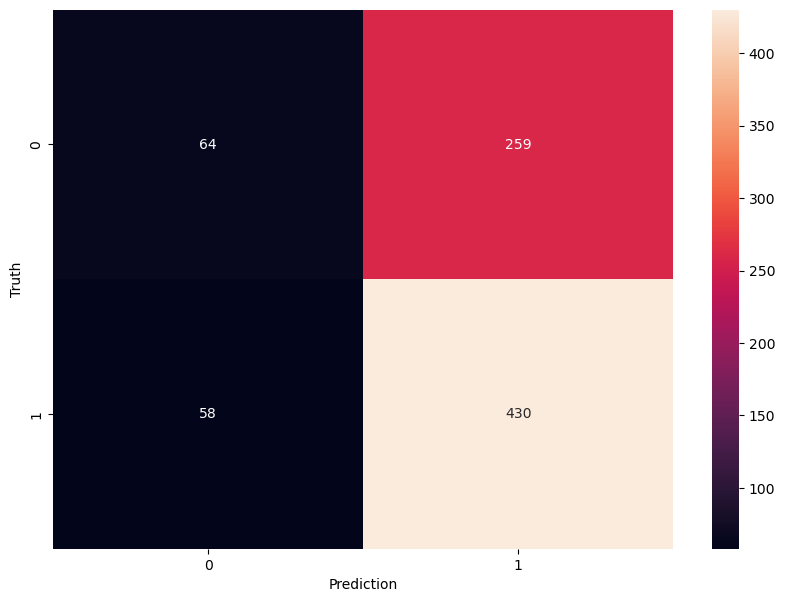

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(result_whitebox_scaled_l1.Target, result_whitebox_scaled_l1.Predictions)

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')